# Exploratory Data Analysis - Terrorism


# Author : Md Abu Bakar Ali Khan
    


Importing all the libraries required for analysis¶


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Importing and observing the data

In [3]:
path = r'C:\Users\dell\Downloads\Global Terrorism - START data\globalterrorismdb_0718dist.csv'

In [6]:
data = pd.read_csv(path)

C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [12]:
data.shape

(181691, 135)

In [13]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
data.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [15]:
for i in data.columns:
    print(i,end="\n")

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

Cleaning data

In [19]:
df=data[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [21]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province or State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               181691 non-null  int64  
 1   Month              181691 non-null  int64  
 2   Day                181691 non-null  int64  
 3   Country            181691 non-null  object 
 4   Region             181691 non-null  object 
 5   Province or State  181270 non-null  object 
 6   City               181257 non-null  object 
 7   Latitude           177135 non-null  float64
 8   Longitude          177134 non-null  float64
 9   Location           55495 non-null   object 
 10  Summary            115562 non-null  object 
 11  Attack Type        181691 non-null  object 
 12  Target Type        181691 non-null  object 
 13  Group Name         181691 non-null  object 
 14  Motive             50561 non-null   object 
 15  Weapon Type        181691 non-null  object 
 16  Ki

In [23]:
df.shape

(181691, 19)

In [24]:
df.isnull().sum()

Year                      0
Month                     0
Day                       0
Country                   0
Region                    0
Province or State       421
City                    434
Latitude               4556
Longitude              4557
Location             126196
Summary               66129
Attack Type               0
Target Type               0
Group Name                0
Motive               131130
Weapon Type               0
Killed                10313
Wounded               16311
Add Notes            153402
dtype: int64

In [26]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

<ipython-input-26-62d796404252>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Killed"]=df["Killed"].fillna(0)
<ipython-input-26-62d796404252>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Wounded"]=df["Wounded"].fillna(0)


In [29]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [33]:
for i in df.columns:
    print(df[i].value_counts(dropna=False))

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64
5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: Month, dtype: int64
15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19 

In [35]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526


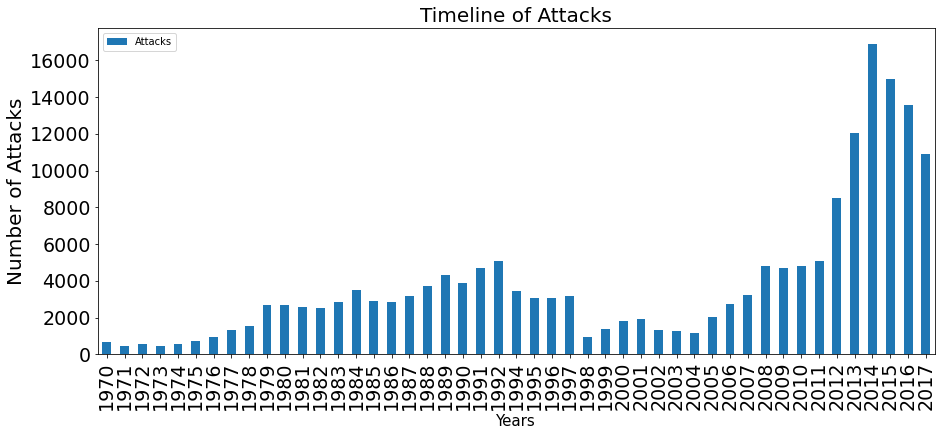

In [38]:
attacks.plot(kind="bar",figsize=(15,6),fontsize=19)
plt.title("Timeline of Attacks",fontsize=20)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

In [39]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


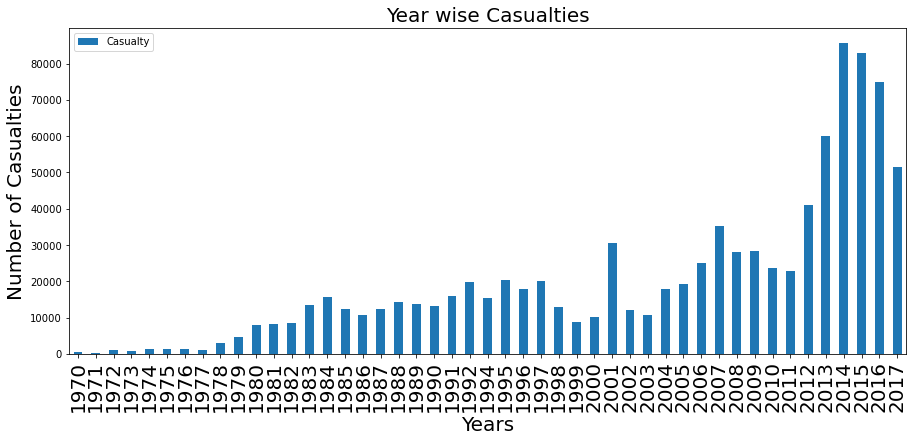

In [40]:
yc.plot(kind="bar",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Number of Casualties",fontsize=20)
plt.show()

In [41]:


yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()



,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [42]:


yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()



,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


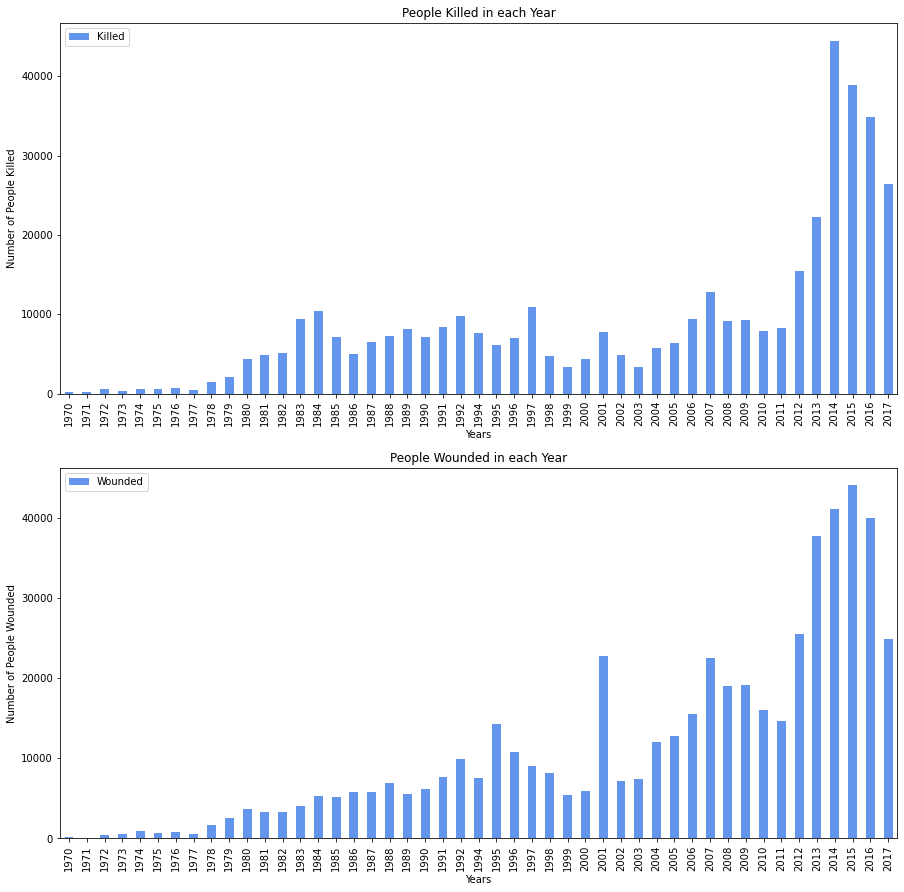

In [43]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed") 

#Wounded
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()


2. Region wise Attacks


In [44]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


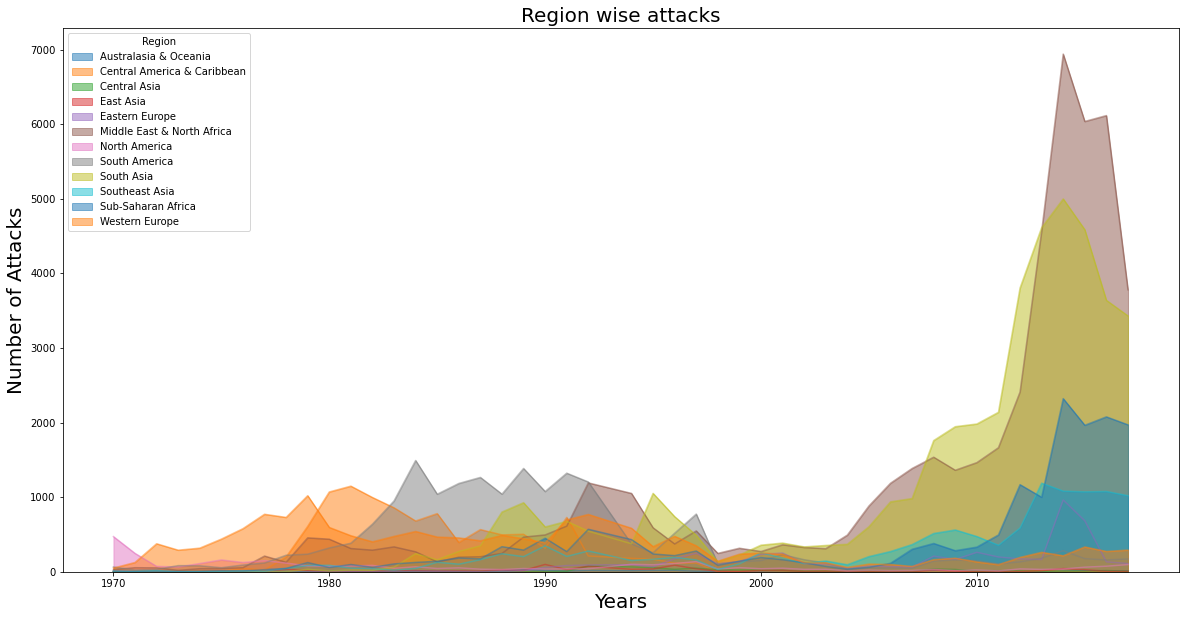

In [45]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

In [46]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

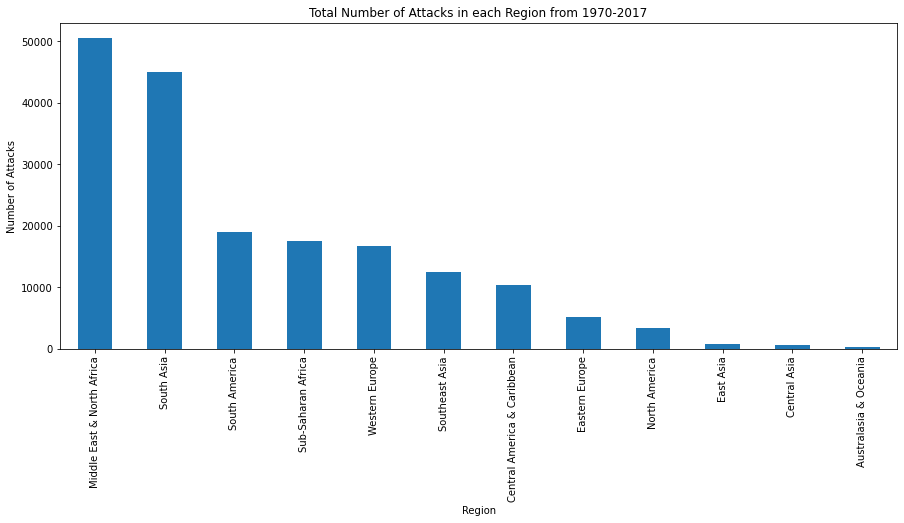

In [47]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

In [48]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


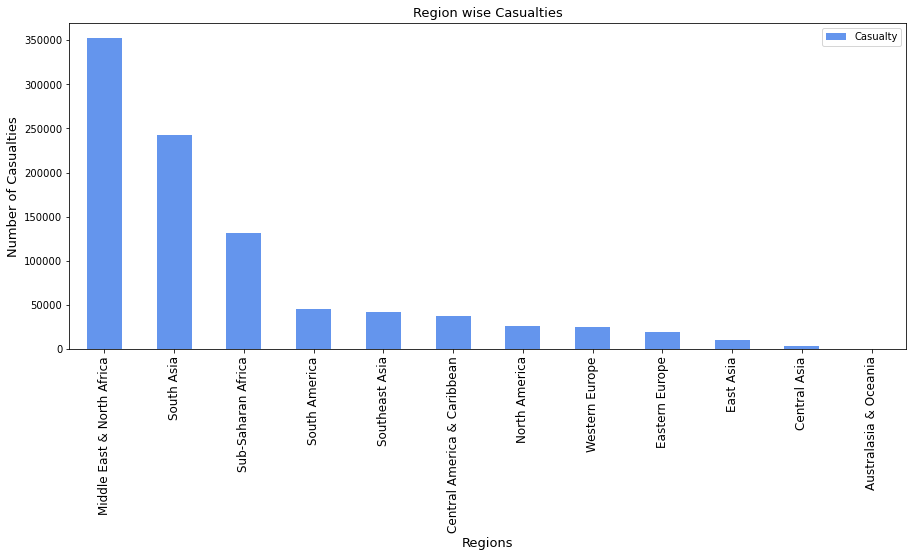

In [49]:
rc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [50]:
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [51]:


rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw



,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


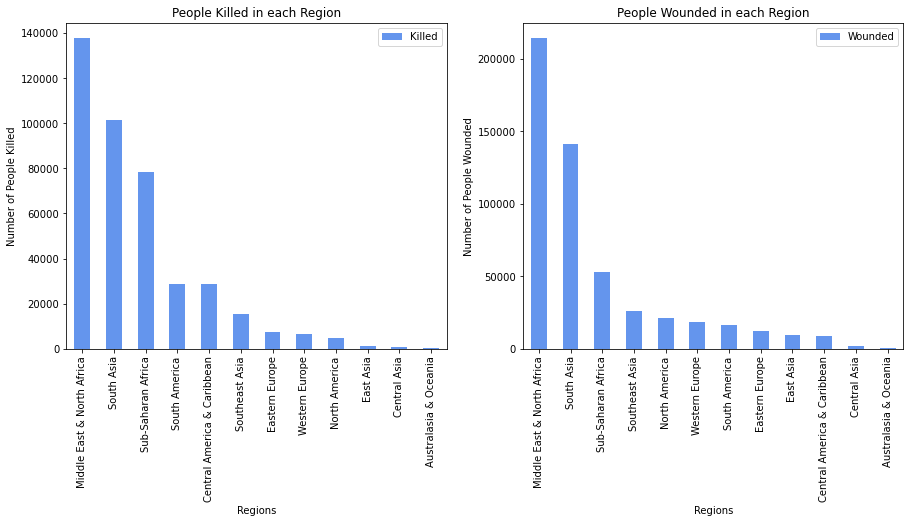

In [52]:


fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#Wounded
rw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()




3. Country wise Attacks - Top 10

In [53]:
ct=df["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

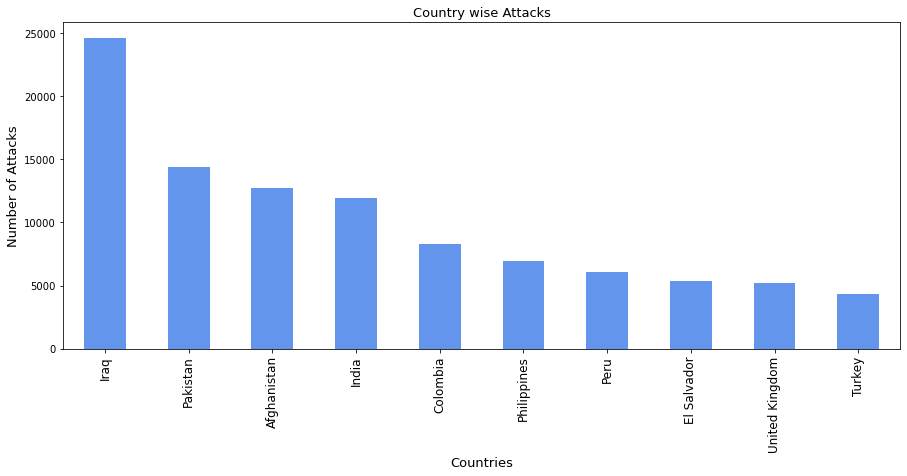

In [54]:
ct.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [55]:


cnc=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
cnc.head(10)



,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


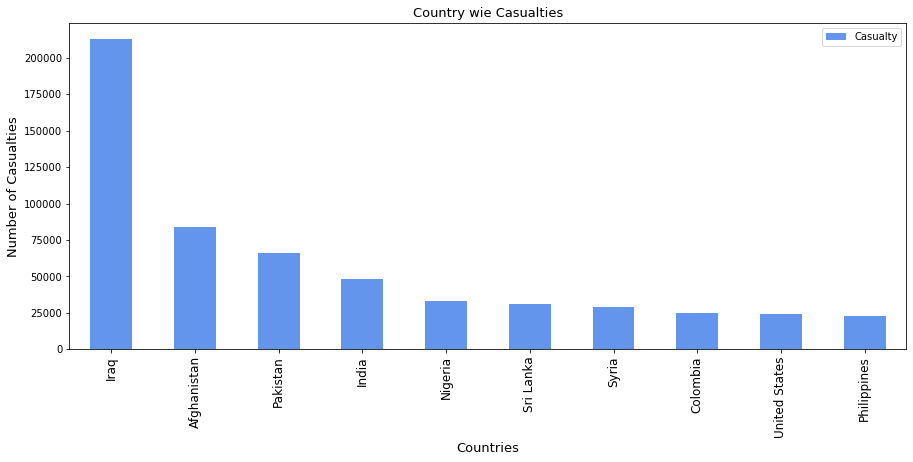

In [56]:


cnc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wie Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()



In [57]:


cnk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnk.head(10)



,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


In [58]:
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cnw.head(10)

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


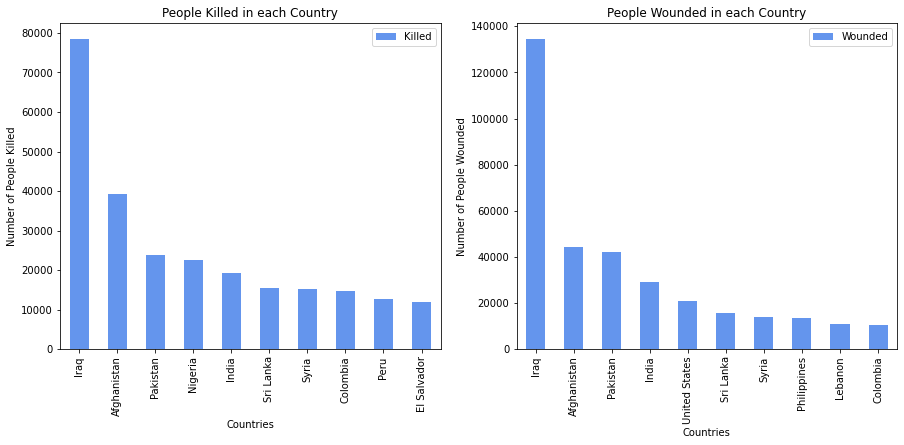

In [59]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

#Wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()


4. City wise Attacks - Top 10

In [60]:
city=df["City"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

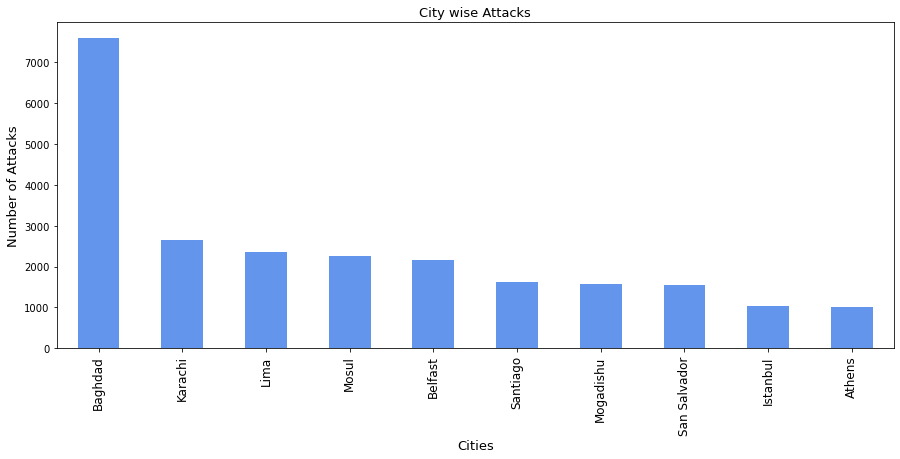

In [61]:
city.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [62]:
cc=df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
cc.head(10)

,Casualty
City,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


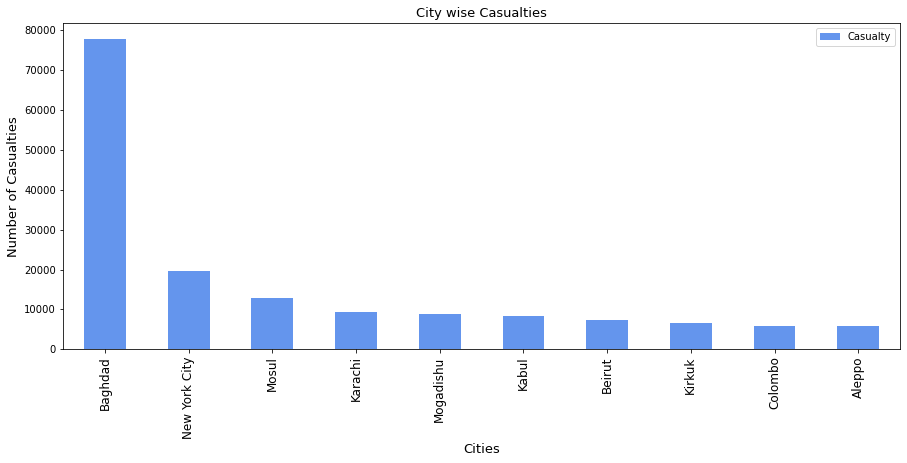

In [63]:


cc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Casualties",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()



In [64]:
ck=df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ck.head(10)

,Killed
City,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0


In [65]:
cw=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
cw.head(10)

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0


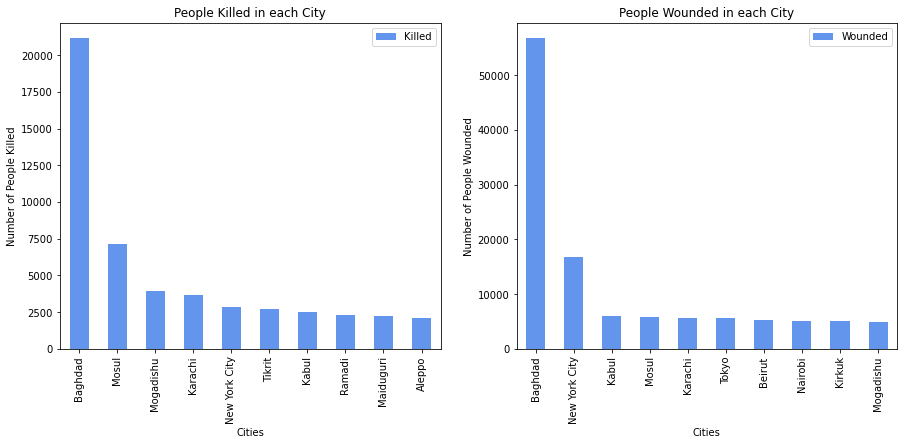

In [66]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ck[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

#Wounded
cw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()


5. Terrorist Group wise Attacks - Top 10¶


In [67]:
grp=df["Group Name"].value_counts()[1:10]
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group Name, dtype: int64

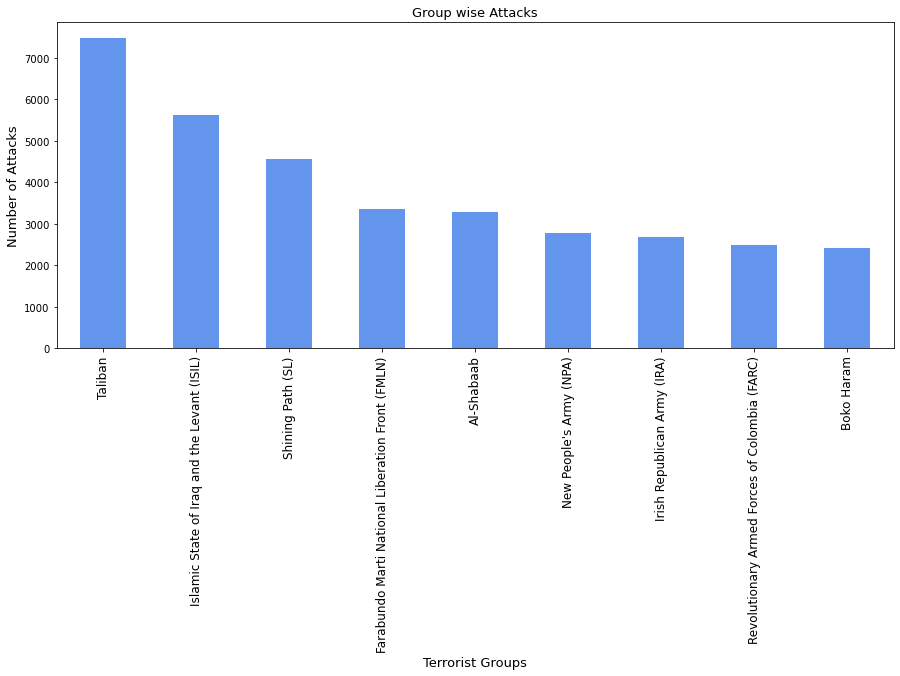

In [68]:
grp.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [69]:
gc=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
gc.head(10)

,Casualty
Group Name,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


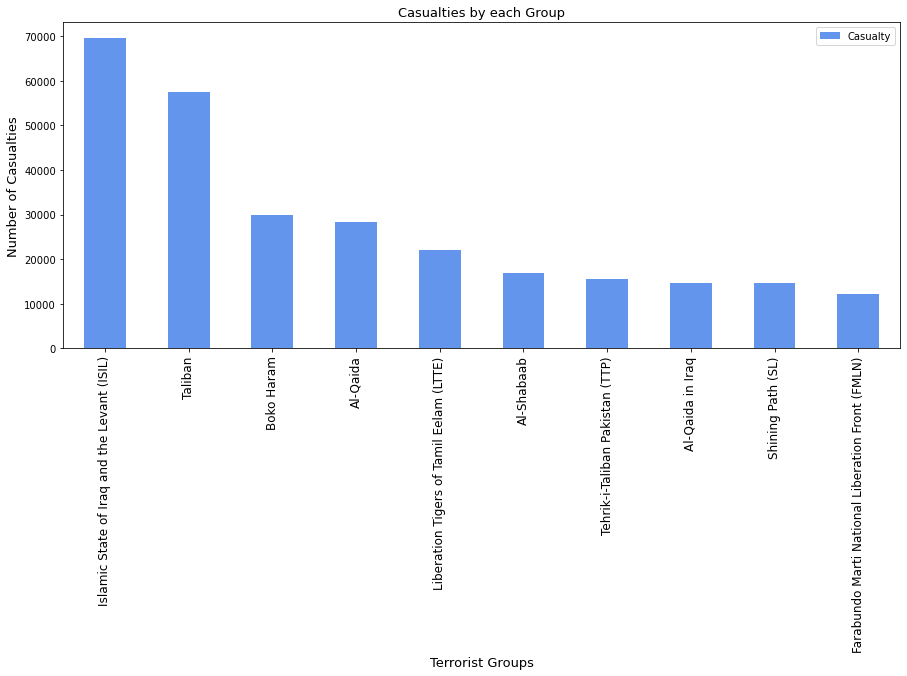

In [70]:
gc.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties by each Group",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [71]:
gk=df[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gk.head(10)

,Killed
Group Name,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


In [72]:
gw=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gw.head(10)

,Wounded
Group Name,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


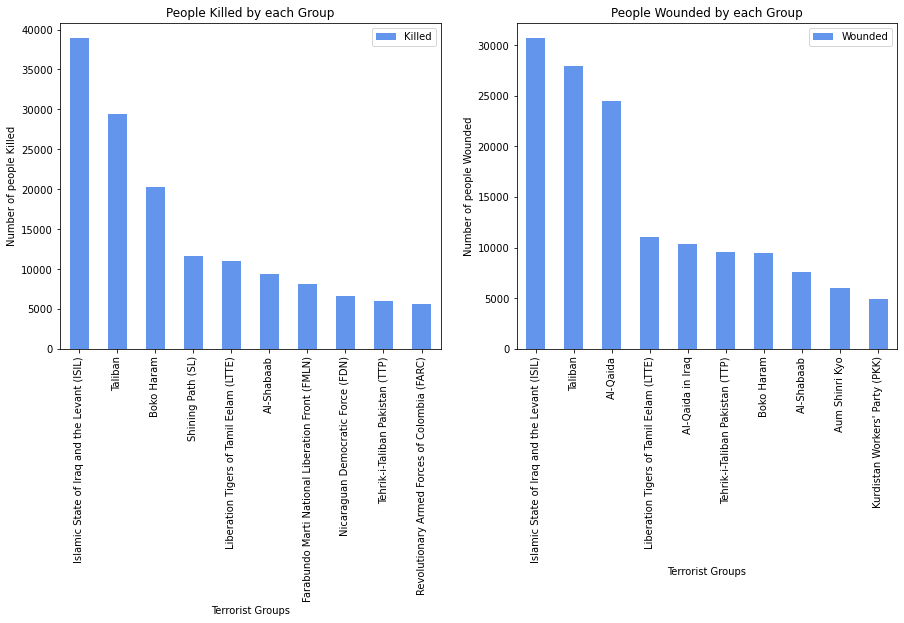

In [73]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people Killed")

#Wounded
gw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people Wounded")
plt.show()


6. Attack Type wise Attacks